In [1]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [2]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
dz = df[mask1][features+["Transported"]]
dz.shape

(1921, 12)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = dz.drop("Transported",axis = 1)
y = dz["Transported"]
X = dz[features]
X_std = sc.fit_transform(X)
X_std

array([[ 0.36973726, -0.29625828, -0.54131821, ..., -0.83412407,
        -1.00888906,  1.13923301],
       [ 1.91308587,  3.37543307, -0.50077521, ..., -0.83412407,
         0.99118926,  1.13923301],
       [-0.11763599, -0.29625828, -0.54131821, ..., -0.83412407,
         0.99118926,  1.13923301],
       ...,
       [ 0.53219501,  3.37543307, -0.54131821, ..., -0.60168803,
        -1.00888906,  0.43418578],
       [-0.19886486, -0.29625828, -0.54131821, ...,  0.60792804,
         0.99118926,  0.43418578],
       [ 0.77588163, -0.29625828, -0.4225178 , ...,  0.60792804,
         0.99118926,  1.13923301]])

In [5]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np


from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import exp
else:
    from scipy import exp


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])

    return X_pc

In [33]:
X_kpca = rbf_kernel_pca(X_std,gamma = 0.1, n_components = 2)

<function matplotlib.pyplot.show(close=None, block=None)>

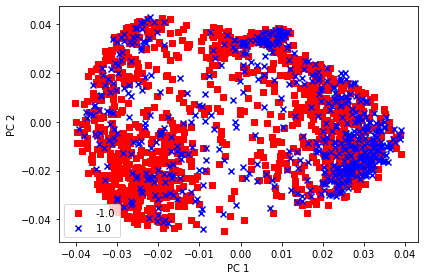

In [34]:
colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_kpca[y == l, 0],X_kpca[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

In [8]:
X_kpca

array([[0.00040008, 0.00188131],
       [0.00037575, 0.00176551],
       [0.0003758 , 0.00176573],
       ...,
       [0.00037575, 0.00176551],
       [0.00037575, 0.00176551],
       [0.00037575, 0.00176551]])

In [10]:
X_kpca_df = pd.DataFrame(X_kpca)
X_kpca_df.shape

(1921, 2)

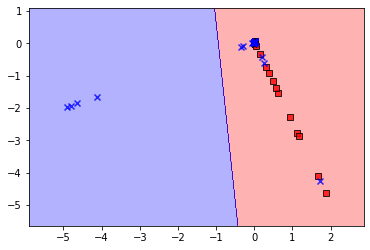

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',solver = 'liblinear')
ppn_test = lr.fit(X_kpca,y)
ds.plot_decision_regions(X_kpca,y,classifier = ppn_test,resolution = 0.001)

In [14]:
lr.score(X_kpca,y)

0.69390942217595

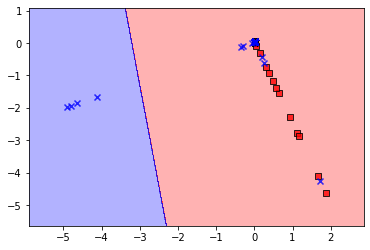

In [12]:
ada_gd = ds.AdalineGD(n_iter = 500, eta = 0.00001)
ppn_test = ada_gd.fit(X_kpca,y)
ds.plot_decision_regions(X_kpca,y,classifier = ppn_test,resolution = 0.01)

<function matplotlib.pyplot.show(close=None, block=None)>

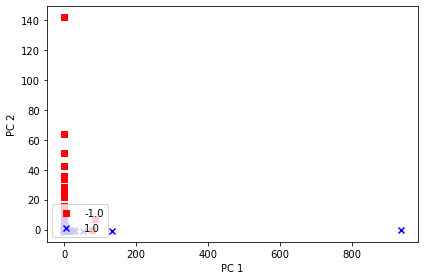

In [58]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'poly', gamma = 0.2)
X_kpca = kpca.fit_transform(X_std)

colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_kpca[y == l, 0],X_kpca[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show
